# EDA  - Exploratory Data Analysis

### Olá, isso é apenas um EDA simples para expor meu conhecimento até o momento com análise de dados utilizando Python e suas libs.

In [542]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [543]:
# Base de filmes por genero
base_filmes = pd.read_csv("dados_brutos/movies.csv")

In [544]:
print("A base de dados possui {} registros de filmes e {} colunas".format(base_filmes.shape[0], base_filmes.shape[1]))

A base de dados possui 9742 registros de filmes e 3 colunas


In [545]:
base_filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [546]:
# Renomeando colunas
base_filmes.rename(columns={"movieId": "id", "title": "filme", "genres": "genero"}, inplace=True)

In [547]:
base_filmes.head()

,id,filme,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [548]:
# Base de notas da base de filmes
base_notas = pd.read_csv("dados_brutos/ratings.csv")

In [549]:
print("A base de dados possui {} registros de notas e {} colunas".format(base_notas.shape[0], base_notas.shape[1]))

A base de dados possui 100836 registros de notas e 4 colunas


In [550]:
base_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [551]:
# Merge entre as bases para trazer as notas no dataframe "base_filmes"
base_filmes = base_filmes.merge(base_notas[["movieId", "rating"]], left_on="id", right_on="movieId", how="right")

In [552]:
base_filmes.head()

,id,filme,genero,movieId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,3,Grumpier Old Men (1995),Comedy|Romance,3,4.0
2,6,Heat (1995),Action|Crime|Thriller,6,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,47,5.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,50,5.0


In [553]:
# Exclusão da coluna excedente usada no relacionamento
base_filmes = base_filmes.drop("movieId", axis=1)

In [554]:
print("Agora a base_filmes possui {} registros de filmes e notas com {} colunas".format(base_notas.shape[0], base_notas.shape[1]))

Agora a base_filmes possui 100836 registros de filmes e notas com 4 colunas


In [555]:
base_filmes.head()

,id,filme,genero,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,3,Grumpier Old Men (1995),Comedy|Romance,4.0
2,6,Heat (1995),Action|Crime|Thriller,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0


In [556]:
# Renomeando a coluna rating
base_filmes.rename(columns={"rating": "notas"}, inplace=True)

In [557]:
base_filmes.head()

,id,filme,genero,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,3,Grumpier Old Men (1995),Comedy|Romance,4.0
2,6,Heat (1995),Action|Crime|Thriller,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0


In [558]:
# Ordenando pela coluna notas
#base_filmes = base_filmes.sort_values(by="notas", ascending=False)

In [559]:
# Contagem de notas
historico_notas = base_filmes["notas"].value_counts()

In [560]:
print("Quantidade por",historico_notas)

Quantidade por notas
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64


In [561]:
# Conferindo se existe dados nulos no dataframe
base_filmes.isna().sum()

id        0
filme     0
genero    0
notas     0
dtype: int64

In [562]:
# Informações do tipo de dados de cada colina
base = pd.DataFrame(base_filmes.dtypes, columns = ["Tipo de dados"])

In [563]:
base.columns.name = "Coluna"

In [564]:
base

Coluna,Tipo de dados
id,int64
filme,object
genero,object
notas,float64


In [565]:
base_filmes.head()

,id,filme,genero,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,3,Grumpier Old Men (1995),Comedy|Romance,4.0
2,6,Heat (1995),Action|Crime|Thriller,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0


In [566]:
pd.set_option('display.max_rows', None)

In [567]:
toystore = (base_filmes["filme"] == "Toy Story (1995)").value_counts()

In [568]:
print("A base de dados possui {} registros de outros filmes e o registro de notas para Toy Story igual a {} linhas".format(toystore[0], toystore[1]))

A base de dados possui 100621 registros de outros filmes e o registro de notas para Toy Story igual a 215 linhas


In [569]:
# Dados estatisticos da coluna "notas"
base_filmes["notas"].describe().round(2)

count    100836.00
mean          3.50
std           1.04
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00
Name: notas, dtype: float64

In [570]:
filmes_nota_cinco = base_filmes.loc[base_filmes["notas"] == 5.0]

In [571]:
filmes_nota_cinco.head()

,id,filme,genero,notas
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,5.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,5.0
6,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,5.0
8,151,Rob Roy (1995),Action|Drama|Romance|War,5.0
9,157,Canadian Bacon (1995),Comedy|War,5.0


In [572]:
filmes_nota_cinco["notas"].count()

13211

In [573]:
# Children|Comedy|Fantasy|Musical

In [574]:
filmes_infantis_nota5 = filmes_nota_cinco[filmes_nota_cinco["genero"].str.contains("Children")]

### Relação de nota 5 do filme Toy Story

In [575]:
toy_story_notas = base_filmes[base_filmes["filme"] == "Toy Story (1995)"]

In [576]:
notas_TS = toy_story_notas["notas"].value_counts().sort_index()

In [577]:
notas_gerais = range(1, 7)
listagem = [notas_TS.get(nota, 0.5) for nota in notas_gerais]

<function matplotlib.pyplot.show(close=None, block=None)>

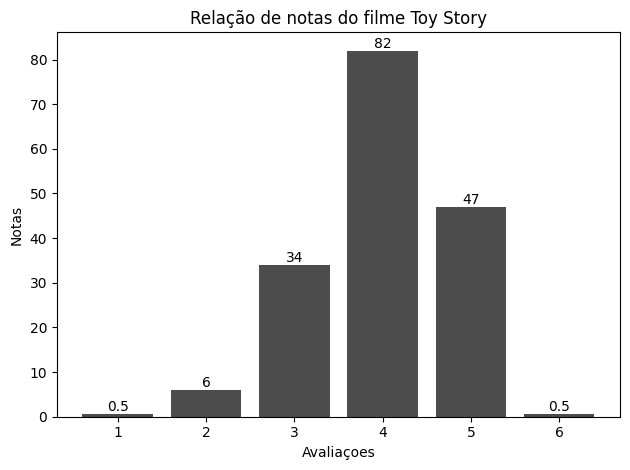

In [578]:
# Comparativo de notas do filme toy story

plt.bar(notas_gerais, listagem, color="black", alpha=0.7)
plt.xlabel("Avaliaçoes")
plt.ylabel("Notas")
plt.title("Relação de notas do filme Toy Story")

for n, nota in enumerate(notas_gerais):
    plt.text(nota, listagem[n], str(listagem[n]), ha="center", va="bottom")
             

plt.tight_layout()        
plt.show

In [579]:
toy_story_notas.shape

(215, 4)

### Relação das notas do top 10 da base_filmes

In [580]:
# Top 10 filmes da base e suas respectivas notas
top10_notas_filmes = base_filmes.head(10)

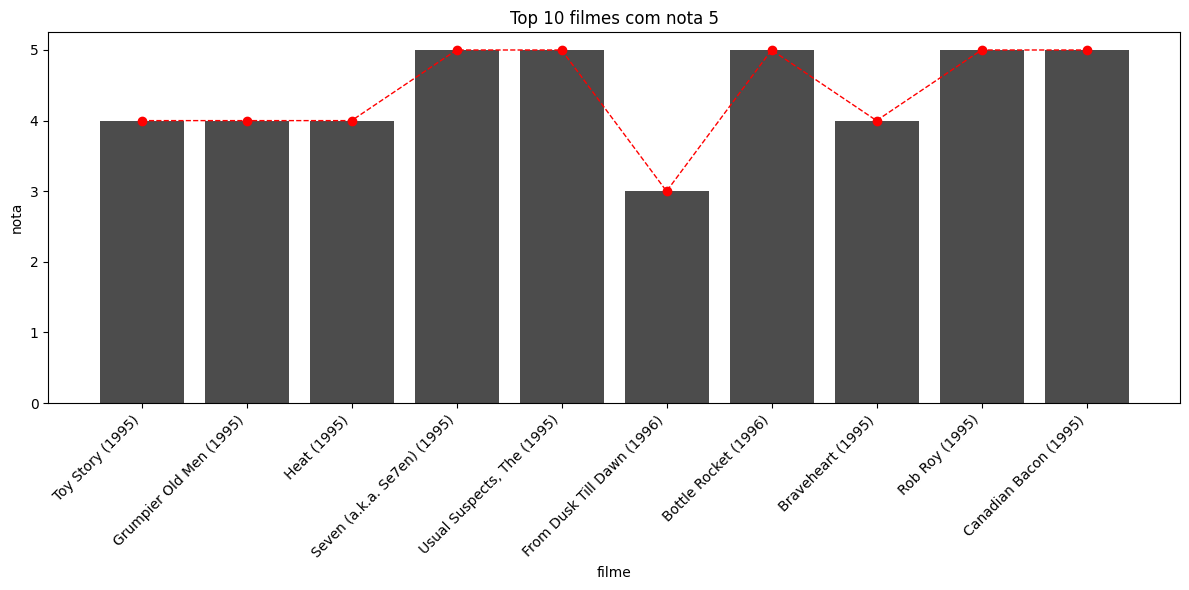

In [581]:
filmes = top10_notas_filmes["filme"]
qtd_notas = top10_notas_filmes["notas"]

plt.figure(figsize=(12,6))
plt.bar(filmes, qtd_notas, color='black', alpha=0.7)
plt.plot(filmes, qtd_notas, linestyle='--', marker='o', color='red', label='Notas 5', linewidth=1) # parametros da linha tracejada

plt.xticks(rotation=45, ha="right") # rotação do eixo x


plt.xlabel("filme")
plt.ylabel("nota")
plt.title("Top 10 filmes com nota 5")

plt.tight_layout() # ajuste de layout do gráfico
plt.show()

### Outlier da base_filmes 

In [582]:
Q1 = base_filmes["notas"].quantile(0.25) # primeiro quartil
Q3 = base_filmes["notas"].quantile(0.75) # terceiro quartil

# Calcule o intervalo interquartil
IQR = Q3 - Q1

In [583]:
# Defina limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [584]:
# Identifique os outliers
desvio_padrao = base_filmes[(base_filmes["notas"] < limite_inferior) | (base_filmes["notas"] > limite_superior)]

In [585]:
# Exiba os outliers
desvio_padrao.head()

,id,filme,genero,notas
205,3176,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,1.0
261,31,Dangerous Minds (1995),Drama,0.5
262,527,Schindler's List (1993),Drama|War,0.5
263,647,Courage Under Fire (1996),Action|Crime|Drama|War,0.5
264,688,Operation Dumbo Drop (1995),Action|Adventure|Comedy|War,0.5


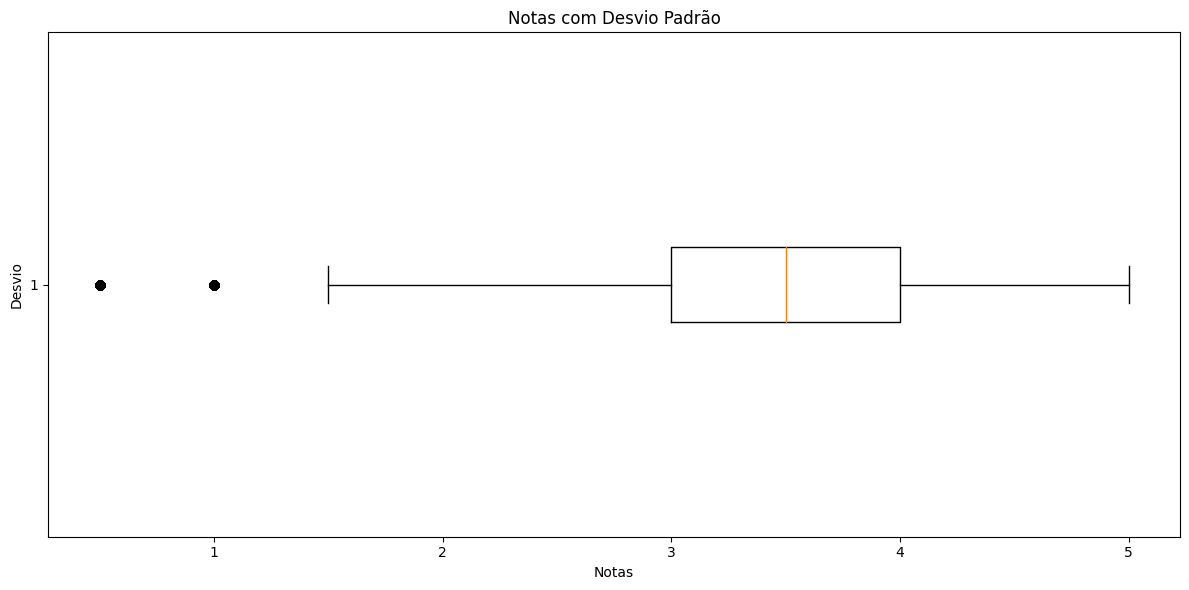

In [586]:
# Boxplot para visualizar os dados e os outliers
plt.figure(figsize=(12,6))
plt.boxplot(base_filmes["notas"], vert=False)
plt.scatter(desvio_padrao["notas"], [1] * len(desvio_padrao), color="black",marker="o")
plt.title("Notas com Desvio Padrão")
plt.xlabel("Notas")
plt.ylabel("Desvio")
plt.tight_layout() # ajuste de layout do gráfico
plt.show()

In [587]:
# Resumo estatístico da base_filmes
media = base_filmes["notas"].mean()
mediana = base_filmes["notas"].median()
minimo = base_filmes["notas"].min()
maximo = base_filmes["notas"].max()

In [588]:
print("A base de dados possui {} de média, {} de mediana, {} de minimo, e {} de maximo".format(media, mediana, minimo, maximo))

A base de dados possui 3.501556983616962 de média, 3.5 de mediana, 0.5 de minimo, e 5.0 de maximo


### Teste de hipóteses

In [589]:
#"Adventure|Animation|Children|Comedy|Fantasy"
#"Animation|Children|Fantasy|Musical"
filmes_infantil_aventura = base_filmes[base_filmes["genero"] == "Adventure|Animation|Children|Comedy|Fantasy"]["notas"]
filmes_infantil_fantasia = base_filmes[base_filmes['genero'] == "Animation|Children|Fantasy|Musical"]["notas"]

In [590]:
estat_t, valor_p = sts.ttest_ind(filmes_infantil_aventura, filmes_infantil_fantasia, equal_var=False)

In [591]:
alfa = 0.05

In [592]:
if valor_p < alfa:
    print("Rejeite a hipótese nula (H0)")
    print("Existe uma diferença significativa nas médias de avaliações entre filmes de aventura e fantasia.")
else:
    print("Não rejeite a hipótese nula (H0)")
    print("Não há diferença significativa nas médias de avaliações entre filmes de aventura e fantasia.")

Rejeite a hipótese nula (H0)
Existe uma diferença significativa nas médias de avaliações entre filmes de aventura e fantasia.


### Salvando a base em excel

In [593]:
caminho_arquivo = "dados_tratados/avaliacoes_de_filmes.xlsx"

In [594]:
# Salvando base tratada em excel
base_filmes.to_excel(caminho_arquivo, index=False)